In [228]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

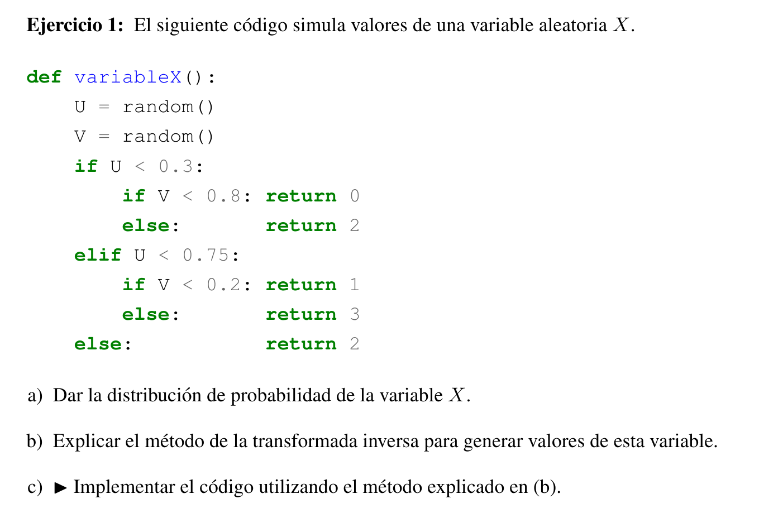

0 = 0.3*0.8 = 0.24

1 = 0.45*0.2 = 0.09

2 = 0.3*0.2 + 0.25 = 0.31

3 = 0.45*0.8 = 0.36

El metodo de la transformada inversa consiste en generar un valor entre 0 y 1, y comparar ese valor con las probabilidades acomuladas de distribucion. Se asignara el valor de la variable aleatoria a la primera probabilidad acomulada que sea mayor o igual al valor generado aleatoriamente.

In [229]:
probs_x = [0.24, 0.09, 0.31, 0.36]

def tinversa(probs):
    U = rd.random()
    acum = 0
    for i in range(len(probs)):
        acum += probs[i]
        if U < acum:
            return i

In [230]:
sims = [tinversa(probs_x) for i in range(10000)]

np.unique(sims, return_counts=True)[1]/10000


array([0.235 , 0.0923, 0.309 , 0.3637])

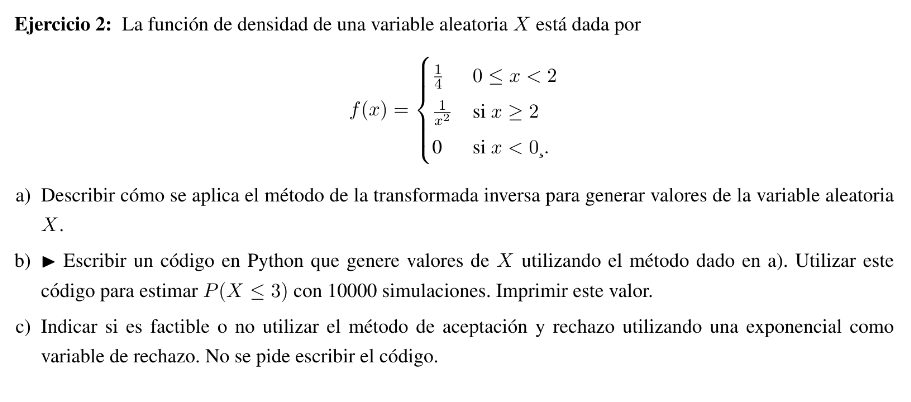

Si 
$$
0 \leq x \lt 2 \\
F(X) = \int_{-\inf}^{0} 0 dt + \int_{0}^{x} 1/4 dt = \frac{x}{4} \\

x \geq 2 \\
F(X) = \int_{-\infty}^{0} 0 dt + \int_{0}^{2} 1/4 dt + \int_{2}^{x} 1/t^2 dt = 1 - \frac{1}{x} \\
$$

Siendo la siguiente la funcion de distribucion acomulada, debo encontrar la inversa.

$$
F(X) = \begin{cases}
\frac{x}{4} & \text{si } 0 \leq x \lt 2 \\
1 - \frac{1}{x} & \text{si } x \geq 2 \\
0 & \text{si } x \lt 0
\end{cases}
$$

Calculo la inversa

$$
F^{-1}(X) = \begin{cases}
4x & \text{si } 0 \leq x \lt 0.5 \\
\frac{1}{1+x} & \text{si } 0.5 \leq x \lt 1 
\end{cases}
$$

In [231]:
def f_X_ej2(x):
    if 0 <= x < 2:
        return 1/4
    elif x >= 2:
        return 1/(x**2)
    else:
        return 0

def F_x_ej2(x):
    if 0 <= x < 2:
        return x/4
    elif x >= 2:
        return 1 - 1/x
    else:
        return 0

In [232]:
def F_inv_x_ej2(x):
    if 0 <= x < 0.5:
        return 4*x
    elif 0.5 <= x < 1:
        return 1/(1-x)
    else:
        return 0

def tinversa_ej2():
    U = rd.random()
    return F_inv_x_ej2(U)

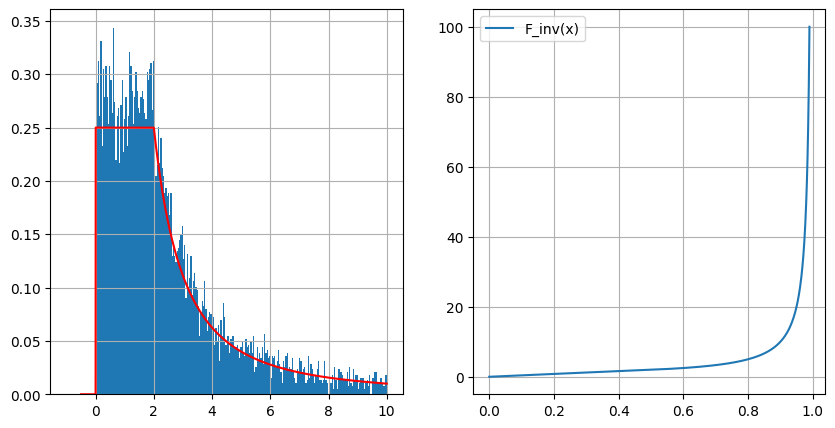

In [233]:
# datos de funcion de distribucion acomulada e inversa
x_F = np.linspace(-20,100,100000)
y_F = [F_x_ej2(i) for i in x_F]

x_inv = np.linspace(0,0.99,1000)
y_inv = [F_inv_x_ej2(i) for i in x_inv]


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].plot(x_inv, y_inv, label='F_inv(x)')
#ax[1].plot(x_F, y_F, label='F(x)')
ax[1].legend()
ax[1].grid()


# grafico la funcion de densidad y los valores generados
x = np.linspace(-0.5,10,10000)
y = [f_X_ej2(i) for i in x]

tinv_vals = [tinversa_ej2() for i in range(10000)]

ax[0].hist(tinv_vals, bins=256, density=True, range=(-1,10))
ax[0].plot(x, y, 'r')
ax[0].grid()


plt.show()


Para estimar el valor de P(x <= 3), voy a realizar 10000 simulaciones y contar cuantas veces se cumple la condicion x <= 3.

In [234]:
def x_menor_z_ej2(z, nsims):
    count = 0
    for _ in range(nsims):
        x = tinversa_ej2()
        if x <= z:
            count += 1

    return count/nsims

nsims = 10000
print("Probabilidad de que X <= 3: ", x_menor_z_ej2(3, nsims))
print("Probabilidad teorica (F(3)): ", F_x_ej2(3))

Probabilidad de que X <= 3:  0.6639
Probabilidad teorica (F(3)):  0.6666666666666667


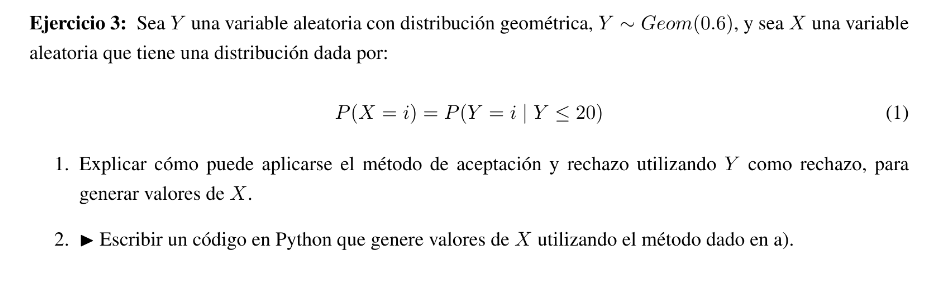

X solo tomara valores entre 1 y 20, y con la misma probabilidad que Y.

In [235]:
def geometrica(p):    
    return int(np.log(1-rd.random())/np.log(1-p)) + 1

def arechazo_ej3():
    while True:
        y = geometrica(0.6)
        if y <= 20:
            return y

def p_Y(n):
    return 0.6*(1-0.6)**(n-1)

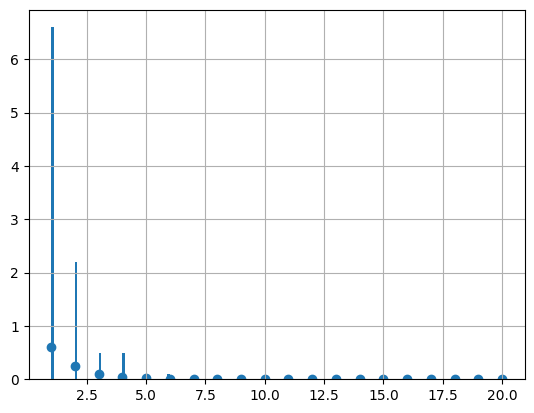

Probabilidad de que Y = 1:  0.043
Probabilidad teorica:  0.03840000000000001


In [236]:
sims_x = [arechazo_ej3() for i in range(100)]

# genero valores de Y para i = 1, 2, ..., 30

x = np.arange(1, 21)
y = [p_Y(i)/1-(1-0.6)**20 for i in x]

plt.hist(sims_x, bins=50, density=True)
plt.scatter(x, y, label='Geometrica(0.6)')
plt.grid()
plt.show()

def igual1():
    count = 0
    for i in range(10000):
        x = geometrica(0.6)
        if x == 4:
            count += 1
    return count/10000

print("Probabilidad de que Y = 1: ", igual1())
print("Probabilidad teorica: ", p_Y(4))

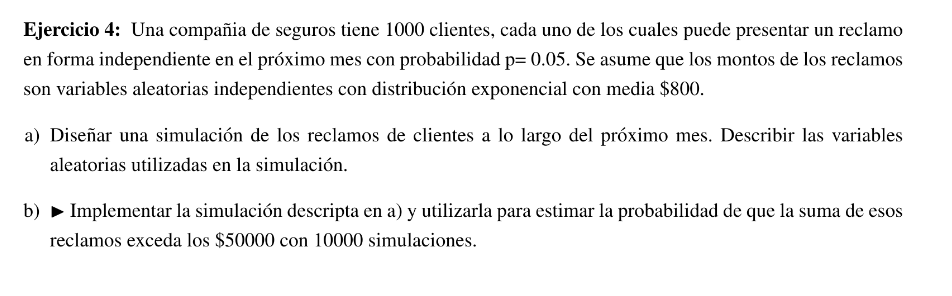

puedo representar la cantidad de reclamos como un valor de una variable Binomial con n = 1000 y p=0.05, ya que contabiliza la cantidad de exitos en una muestra de n ensayos con probabilidad p de exito en cada ensayo. Y luego por cada reclamo, genero un valor de una exponencial con media 800, es decir lambda = 1/800.

In [268]:
def binomial(n, p):
    c = p/(1-p)
    prob = (1-p)**n
    F = prob
    i = 0
    u = rd.random()
    while u >= F:
        prob *= c * ((n-i)/(i+1))
        F += prob 
        i += 1
    return i

def gen_exponecial(lam):
    return -np.log(1-rd.random())/lam

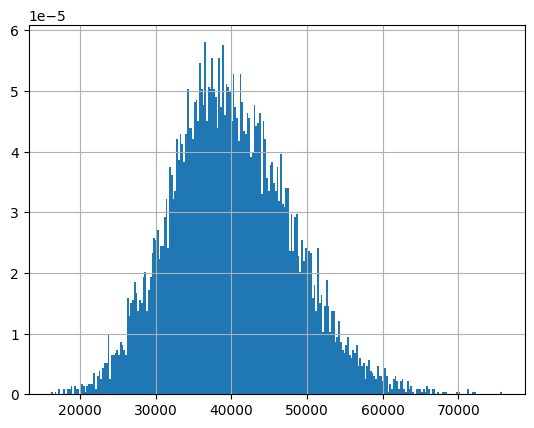

In [270]:
def ej4():
    sum_rec = 0
    reclamos = binomial(1000, 0.05)
    for i in range(reclamos):
        sum_rec += gen_exponecial(1/800)
    return sum_rec

sims = [ej4() for i in range(10000)]

plt.hist(sims, bins=256, density=True)
plt.grid()
plt.show()

In [284]:
def rec_mayor_x(x, nsims):
    count = 0
    for _ in range(nsims):
        rec = ej4()
        if rec > x:
            count += 1
    return count/nsims

x = 50000
print(f"Prob reclamos > {x}: ", rec_mayor_x(x, 10000))

Prob reclamos > 50000:  0.1058
